## 编程实现对率回归
## Use python code to realize Logistic regression

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 西瓜数据集3.0$\alpha$
### import data from csv file

In [6]:
data = pd.read_csv('data.csv')

In [9]:
dataset = np.array(data)

#### 前两列为自变量，最后一列为因变量
#### seperate data into different attributes

In [12]:
x = dataset[:, :-1]
y = dataset[:, -1]

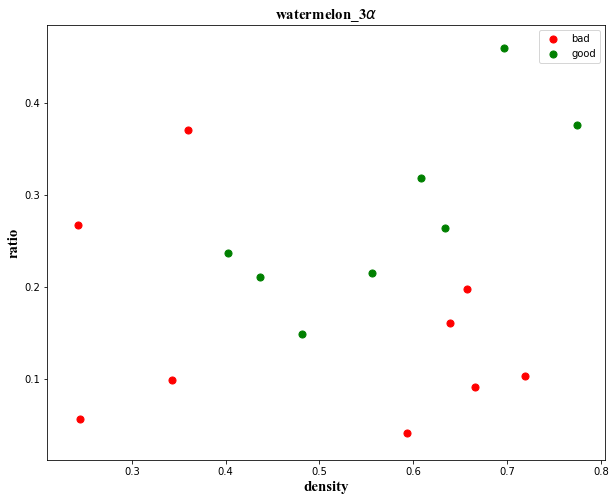

In [35]:
#### plot data ####
fgsize = 10,8
figure, fg = plt.subplots(figsize = fgsize)
font1 = {'family' : 'Times New Roman','weight' : 'normal','size'   : 15}
plt.title('watermelon_3' + r'$\alpha$', font1)
plt.xlabel('density', font1)
plt.ylabel('ratio', font1)

plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 50, c = 'r', label = 'bad')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 50, c = 'g', label = 'good')
plt.legend(loc = 'upper right')

#### Sigmoid function:
### $$y=\frac{1}{1+e^{-(\omega^Tx+b)}}$$
#### minimize:
### $$\mathscr{l}(\beta)=\sum_{i = 1}^{m}\big(-y_i\beta^T\hat{x_i}+ln(1+e^{\beta^T\hat{x_I}})\big)$$

### 考虑用梯度下降法求解上式最小值时对应的参数
### Use follow fomula to calculate the gradient of equation above
### $$\frac{\partial\mathcal{l}(\beta)}{\partial\beta}=-\sum_{i=1}^{m}\hat{x_i}\big(y_i-p_1(\hat{x_i};\beta)\big)$$
### according to the Taylor expansion （appendix eq. B.16-B.17）
### $$f(x+\Delta x)\simeq f(x)+\Delta x^T\triangledown f(x)$$
### $$\Delta x = -\gamma \triangledown f(x)$$ where $\gamma$ is a small constant. We need use eq. B.16 to calculate the gradient $\triangledown f(\beta)$, then use eq. B.17 to calculate new value of $\Delta \beta$.

In [50]:
### define likelihood function ###
def likelihood_fun(X, Y, Beta):
    '''
    X: sample variables vector in eq.3.27
    y: sample label in eq.3.27
    beta: parameter vector in eq.3.27 
    '''
    
    sum = 0
    
    for i in range(np.shape(a)[0]):
        sum += -Y[i]*np.dot(Beta.T, X[i]) + np.log(1 + np.exp(np.dot(Beta.T, X[i])))
    
    return sum

### 定步长梯度下降法（constan step gradient descent method)

In [79]:
def gradDescent_const(X, Y):
    '''
    return: the best parameter estimate of eq.3.27
    '''
    
    h = 0.1 #step length of iteration
    iteration = 500
    n = np.shape(X)[1]
    w = []
    b = []
    
    ### initialization ###
    Beta = np.zeros(n)
    delta_Beta = np.ones(n)*h
    llh = 0
    llh_temp = 0
    
    for i in range(iteration):
        Beta_temp = Beta.copy()
        
        # partial derivative #
        for j in range(n):
            Beta[j] += delta_Beta[j]
            llh_temp = likelihood_fun(X, Y, Beta)
            delta_Beta[j] = - h * (llh_temp - llh) / delta_Beta[j]
            Beta[j] = Beta_temp[j]
            
        Beta += delta_Beta
        w.append(Beta[0])
        b.append(Beta[1])
        llh = likelihood_fun(X, Y, Beta)
        
    return Beta, w, b

In [75]:
gradDescent_const(x, y)

array([6.67590025, 1.58147278])

### 随机梯度下降法 (stochastic gradient descent method)
#### 核心思想：增量学习 (incremental learning), use a new sample to update regression coefficient

In [82]:
def gradDescent_stoc(X, Y):
    
    ### initialization ###
    m, n = np.shape(X)
    h = 0.5
    Beta = np.zeros(n)
    w = []
    b = []
    delta_Beta = np.ones(n) * h
    llh = 0
    llh_temp = 0
    
    for i in range(m):
        Beta_temp = Beta.copy() # for partial derivative
        
        for j in range(n):
            h = 0.5 * 1 / (1 + i + j) # update step length of iterator
            Beta[j] += delta_Beta[j]
            llh_temp = -Y[i]*np.dot(Beta.T, X[i]) + np.log(1 + np.exp(np.dot(Beta.T, X[i])))
            delta_Beta[j] = - h * (llh_temp - llh) / delta_Beta[j]
            Beta[j] = Beta_temp[j]
            
        Beta += delta_Beta
        w.append(Beta[0])
        b.append(Beta[1])
        llh = -Y[i]*np.dot(Beta.T, X[i]) + np.log(1 + np.exp(np.dot(Beta.T, X[i])))
    
    return Beta, w, b

In [81]:
const = gradDescent_const(x, y)

In [83]:
stoc = gradDescent_stoc(x, y)

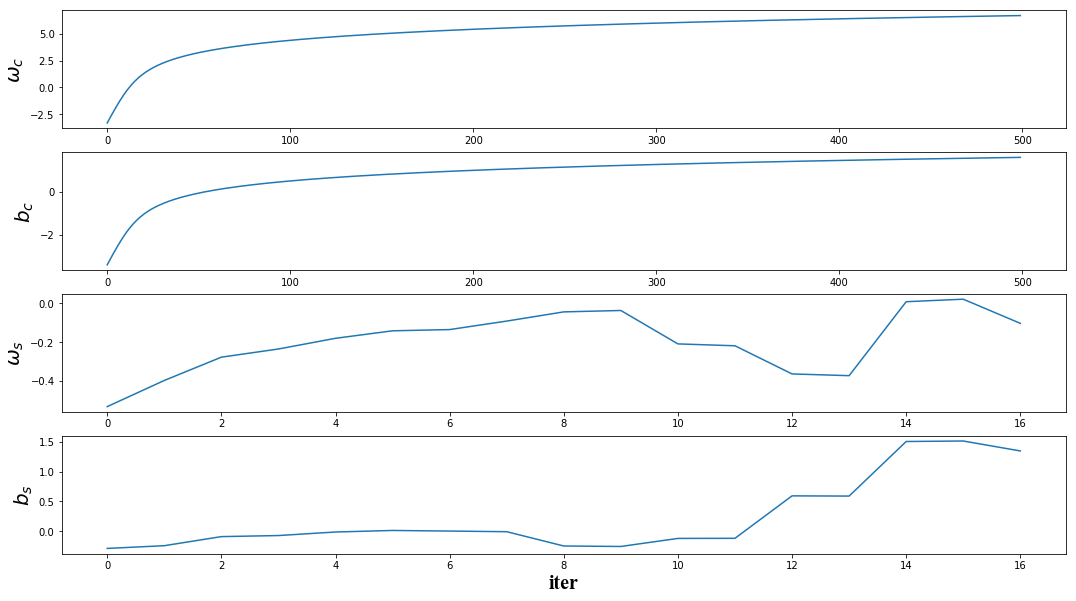

In [97]:
figure, axes = plt.subplots(4, 1, figsize = (18,10))

axes[0].set_ylabel(r'$\omega_c$', fontsize = 20)
axes[0].plot(const[1])
axes[1].set_ylabel(r'$b_c$', fontsize = 20)
axes[1].plot(const[-1])
axes[2].set_ylabel(r'$\omega_s$', fontsize = 20)
axes[2].plot(stoc[1])
font2 = {'family' : 'Times New Roman','weight' : 'normal','size'   : 20}
axes[3].set_xlabel('iter', font2)
axes[3].set_ylabel(r'$b_s$', fontsize = 20)
axes[3].plot(stoc[-1])